# <center> CHE1147 Programming Assignment 6 <center>

#### <center> Yunjie Xu 1008601951<center> 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, f1_score

## 1.1 Dataset size vs model performance


In [2]:
#create monthly features
kaggle = pd.read_csv('Retail_Data_Response.csv')
kaggle.head()

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1


In [3]:
mth_rolling_features = pd.read_excel('mth_rolling_features.xlsx')
mth_rolling_features = mth_rolling_features.drop('Unnamed: 0', axis = 1)
mth_rolling_features = mth_rolling_features.fillna(0)
mth_rolling_features.head()

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt,amt_sum_3M,amt_mean_3M,amt_max_3M,txn_cnt_sum_3M,txn_cnt_mean_3M,txn_cnt_max_3M,...,amt_max_6M,txn_cnt_sum_6M,txn_cnt_mean_6M,txn_cnt_max_6M,amt_sum_12M,amt_mean_12M,amt_max_12M,txn_cnt_sum_12M,txn_cnt_mean_12M,txn_cnt_max_12M
0,CS1112,2011-05-31,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CS1112,2011-06-30,56,1,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CS1112,2011-07-31,0,0,56.0,18.666667,56.0,1.0,0.333333,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CS1112,2011-08-31,96,1,152.0,50.666667,96.0,2.0,0.666667,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CS1112,2011-09-30,0,0,96.0,32.000000,96.0,1.0,0.333333,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
mth_day_counts = pd.read_excel('mth_day_counts.xlsx')
mth_day_counts = mth_day_counts.drop('Unnamed: 0', axis = 1)
mth_day_counts.head()

,CLNT_NO,ME_DT,cnt_Friday,cnt_Monday,cnt_Saturday,cnt_Sunday,cnt_Thursday,cnt_Tuesday,cnt_Wednesday
0,CS5295,2013-02-28,0,1,0,0,0,0,0
1,CS5295,2015-03-31,0,0,0,0,0,0,0
2,CS5295,2011-11-30,0,1,0,0,0,0,1
3,CS5295,2013-11-30,0,0,0,0,0,0,0
4,CS5295,2014-03-31,0,0,0,0,0,0,0


In [5]:
day_since_last_txn = pd.read_excel('days_since_last_txn.xlsx')
day_since_last_txn = day_since_last_txn.drop('Unnamed: 0', axis = 1)
day_since_last_txn.head()

,CLNT_NO,ME_DT,days_since_last_txn
0,CS1112,2011-05-31,-5
1,CS1112,2011-06-30,15
2,CS1112,2011-07-31,46
3,CS1112,2011-08-31,12
4,CS1112,2011-09-30,42


In [6]:
mth_features_outputs = pd.merge(mth_rolling_features, mth_day_counts, on = ['CLNT_NO', 'ME_DT']).merge(day_since_last_txn, on = ['CLNT_NO', 'ME_DT']).merge(kaggle.rename(columns={'customer_id': 'CLNT_NO'}), on = 'CLNT_NO')
mth_features_outputs.head() 

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt,amt_sum_3M,amt_mean_3M,amt_max_3M,txn_cnt_sum_3M,txn_cnt_mean_3M,txn_cnt_max_3M,...,txn_cnt_max_12M,cnt_Friday,cnt_Monday,cnt_Saturday,cnt_Sunday,cnt_Thursday,cnt_Tuesday,cnt_Wednesday,days_since_last_txn,response
0,CS1112,2011-05-31,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0,0,0,0,0,0,0,-5,0
1,CS1112,2011-06-30,56,1,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0,0,0,0,0,0,1,15,0
2,CS1112,2011-07-31,0,0,56.0,18.666667,56.0,1.0,0.333333,1.0,...,0.0,0,0,0,0,0,0,0,46,0
3,CS1112,2011-08-31,96,1,152.0,50.666667,96.0,2.0,0.666667,1.0,...,0.0,1,0,0,0,0,0,0,12,0
4,CS1112,2011-09-30,0,0,96.0,32.000000,96.0,1.0,0.333333,1.0,...,0.0,0,0,0,0,0,0,0,42,0


    Here, you will quantify the relationship between the dataset size and the model perfor- mance. Essentially, you will answer the question: how much data is enough to model client behaviour? In order to do this, you will pick the best single tree model you created in As- signment #5 and evaluate it with datasets of different sizes using the monthly features you created in Assignment #3.Perform the evaluation with the following steps:

    
    1. Split the train/testsets with 9:1 ratio This split should give you approximately 291k/32k samples in train/test set, respectively.


In [7]:
X_mth = mth_features_outputs.drop(['CLNT_NO', 'response', 'ME_DT'], axis = 1)
y_mth = mth_features_outputs['response']

In [8]:
#Split the data into train and test dateset separetely.
X_train, X_test, y_train, y_test = train_test_split(X_mth, y_mth, test_size=0.1, random_state=1147)

In [9]:
X_train.head()

,mth_txn_amt_sum,mth_txn_cnt,amt_sum_3M,amt_mean_3M,amt_max_3M,txn_cnt_sum_3M,txn_cnt_mean_3M,txn_cnt_max_3M,amt_sum_6M,amt_mean_6M,...,txn_cnt_mean_12M,txn_cnt_max_12M,cnt_Friday,cnt_Monday,cnt_Saturday,cnt_Sunday,cnt_Thursday,cnt_Tuesday,cnt_Wednesday,days_since_last_txn
58727,62,1,62.0,20.666667,62.0,1.0,0.333333,1.0,166.0,27.666667,...,0.500000,3.0,0,1,0,0,0,0,0,11
277132,35,1,155.0,51.666667,61.0,3.0,1.000000,1.0,155.0,25.833333,...,0.333333,1.0,0,0,0,0,1,0,0,7
23949,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,51.0,8.500000,...,0.333333,2.0,0,0,0,0,0,0,0,153
270799,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,33.0,5.500000,...,0.166667,1.0,0,0,0,0,0,0,0,95
41268,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0,0,0,0,0,0,0,-5


In [10]:
len(X_train),len(X_test)

(291193, 32355)

In [11]:
y_train.head()

58727     0
277132    0
23949     0
270799    0
41268     0
Name: response, dtype: int64

    2. Initialize and create a for loop in which you take N samples (e.g. 50), build a treemodel with the N samples and evaluate the test set AUC. Repeat the sampling process10 times and append the test set AUC. The following table shows the desired output:

|N = 50 |samples|
|----|----|
|sample #| Test AUC|
|1| 0.545|
|2| 0.561|
|...|...|
|10| 0.551|

    From this table, you can calculate the mean and standard deviation of the test AUC for N samples.

In [12]:
def N_sample_treemodel(N):
    test_auc = []
    
    for i in range(10):
        X_train_samples = X_train.sample(n = N)
        idx = X_train_samples.index
        y_train_samples = y_train[idx]

        dt = DecisionTreeClassifier(max_depth = 5, 
                                    random_state = 1147, 
                                    class_weight='balanced')
        
        dt.fit(X_train_samples, y_train_samples)

        scores_test  = dt.predict_proba(X_test)[:,1]
        fpr_test, tpr_test, _ = roc_curve(y_test, scores_test)
        test_auc.append(auc(fpr_test, tpr_test))
        test_auc_mean = np.mean(test_auc)
        test_auc_std = np.std(test_auc)
        
    return test_auc, test_auc_mean, test_auc_std

In [13]:
results = N_sample_treemodel(50)

In [14]:
# Test AUC by each ssample
df_TestAUC = pd.DataFrame(results[0],columns=['Test AUC'])
df_TestAUC

,Test AUC
0,0.514889
1,0.495908
2,0.501397
3,0.530693
4,0.533717
5,0.513001
6,0.510738
7,0.496772
8,0.508187
9,0.503213


In [15]:
# calculate the mean and standard deviation of the test AUC for N samples
print (f'The mean of the test AUC for 50 samples is { results[1] }.')
print (f'The standard deviation of the test AUC for 50 samples is { results[2] }.')

The mean of the test AUC for 50 samples is 0.5108516048008368.
The standard deviation of the test AUC for 50 samples is 0.012303763161597377.


    3. Repeat the procedure you performed in the previous step for different sample size N (e.g. 100, 500, 1000, 2000, 5000, 10000) 

In [16]:
sample_sizes = [100, 500, 1000, 2000, 5000, 10000, 15000, 20000, 30000, 50000, 100000]

df_auc = pd.DataFrame(index=['{}'.format(i) for i in list(range(1,11))], 
                      columns=['smaple size {}'.format(size) for size in sample_sizes])

for i in range(len(sample_sizes)):
   
    df_auc.iloc[:,i] = N_sample_treemodel(sample_sizes[i])[0]
    
df_auc

,smaple size 100,smaple size 500,smaple size 1000,smaple size 2000,smaple size 5000,smaple size 10000,smaple size 15000,smaple size 20000,smaple size 30000,smaple size 50000,smaple size 100000
1,0.547154,0.497566,0.557872,0.585832,0.600590,0.614546,0.615710,0.624804,0.632463,0.631316,0.640681
2,0.475312,0.536370,0.539031,0.568627,0.572201,0.617822,0.620691,0.626807,0.623452,0.635674,0.638280
3,0.512396,0.537932,0.558843,0.535579,0.598499,0.613738,0.617047,0.629845,0.635264,0.632671,0.641566
4,0.480408,0.526261,0.555487,0.576398,0.621214,0.607914,0.616406,0.621924,0.624581,0.635874,0.637531
5,0.502914,0.503110,0.561119,0.535817,0.609643,0.617821,0.618930,0.627270,0.631561,0.633535,0.638663
6,0.509927,0.526082,0.532334,0.547898,0.603401,0.616884,0.618102,0.618676,0.633235,0.630352,0.644010
7,0.501241,0.497974,0.545360,0.564206,0.610510,0.617161,0.623315,0.627950,0.628972,0.635015,0.642110
8,0.477075,0.506231,0.554960,0.554107,0.600763,0.618639,0.615924,0.619218,0.634217,0.635753,0.642482
9,0.508782,0.477920,0.509210,0.567736,0.599480,0.592546,0.622748,0.627661,0.629177,0.638476,0.635548
10,0.494105,0.478915,0.571561,0.575932,0.590967,0.613378,0.620984,0.625151,0.627700,0.634907,0.639845


    4. Build a table that contains the values of:
    
       * Sample size N
       
       * Test AUC mean   
       
       * Test AUC standard deviation

In [17]:
df_result = pd.DataFrame(df_auc.T.mean(axis=1),columns=['Mean'])

df_result['Standard Deviation'] = df_auc.T.std(axis=1)

df_result

,Mean,Standard Deviation
smaple size 100,0.500931,0.021364
smaple size 500,0.508836,0.021963
smaple size 1000,0.548578,0.017891
smaple size 2000,0.561213,0.017287
smaple size 5000,0.600727,0.012985
smaple size 10000,0.613045,0.007874
smaple size 15000,0.618986,0.002811
smaple size 20000,0.624931,0.003809
smaple size 30000,0.630062,0.003995
smaple size 50000,0.634358,0.002415


    5. Using the matplotlib function errorbar, plot the model performance captured in the test AUC mean and standard deviation as a function of the sample size. From this plot, can you estimate what is the minimum number of samples needed to model the behaviour adequately?

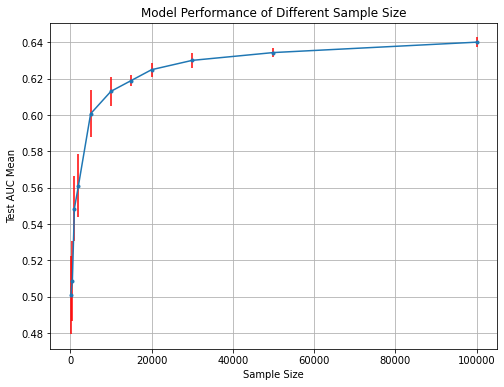

In [18]:
plt.figure(figsize=(8,6))
plt.errorbar(sample_sizes, df_result['Mean'] , df_result['Standard Deviation'], marker = '.', ecolor = 'red')
plt.xlabel('Sample Size')
plt.ylabel('Test AUC Mean')
plt.title('Model Performance of Different Sample Size')
plt.grid()
plt.show()

It is evident from the graph above that test AUC mean scores are rising while standard deviations are falling. The average test AUC score reaches an inflection point at 20000, and the standard deviation nearly remains constant after that. Therefore, 20000 is the required minimum sample size for this decision tree model to function properly.